# Getting started with data analysis using Pandas

Developed by Sam Maurer

Pandas is a popular Python libary for working with data: https://pandas.pydata.org

To use it in this notebook, we'll import it and give it the standard alias "pd":

In [1]:
import pandas as pd

## 1. Pandas data objects: Series and DataFrames

Pandas has two standard structures for working with data: 
- "Series" are like lists
- "DataFrames" are like tables

Pandas data objects include some special metadata, like column names and indexes.

In [2]:
x_list = [1.4, 5.98, 12, 0.0]

print(x_list)

[1.4, 5.98, 12, 0.0]


In [3]:
type(x_list)  # type() is a function that identifies the data type of a variable

list

In [4]:
x_series = pd.Series({"x": [1.4, 5.98, 12, 0.0]})

print(x_series)

x    [1.4, 5.98, 12, 0.0]
dtype: object


In [5]:
type(x_series)

pandas.core.series.Series

In [6]:
data = pd.DataFrame({"x": [1.4, 5.98, 12, 0.0], "y": [17, 40, 52, 0]})

print(data)

       x   y
0   1.40  17
1   5.98  40
2  12.00  52
3   0.00   0


In [7]:
type(data)

pandas.core.frame.DataFrame

As you might expect, each of the columns of a DataFrame is a Series:

In [8]:
type(data['x'])

pandas.core.series.Series

Pandas is part of the same ecosystem as Matplotlib and NumPy. Pandas DataFrames even provide built-in shortcuts to quickly plot data with Matplotlib.

This line allows the graphics to display directly in the notebook:

In [9]:
%matplotlib inline

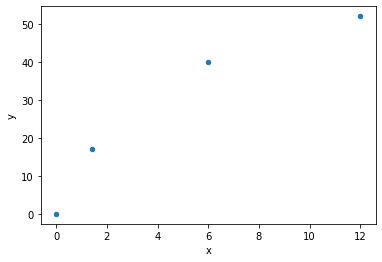

In [10]:
data.plot.scatter('x', 'y')

## 2. Loading and displaying data

We're going to look at some U.S. housing cost data from Zillow: https://www.zillow.com/research/data/

Pandas can load data directly from a URL. In this case, we'll get the median asking rents for 2-bedroom units:

In [11]:
url = "http://files.zillowstatic.com/research/public/Metro/Metro_MedianRentalPrice_2Bedroom.csv"

In [12]:
df = pd.read_csv(url)

If that cell ran successfully, the data has been loaded.

Alternatively, you can load data "locally" -- from a file on the machine where Python is running. In this case, you'd pass to `pd.read_csv()` a **file path** instead of a URL.

And now we have a DataFrame!

In [13]:
type(df)

pandas.core.frame.DataFrame

How much data is there? `len()` is a standard Python function to get the length of things. If we pass it a DataFrame, it tells us the number of rows:

In [14]:
len(df)

384

And there's a DataFrame property called `shape` that tells us a little more:

In [15]:
df.shape  # rows x columns

(384, 122)

(In case you're curious why there aren't any parentheses at the end of `df.shape`, it's because "shape" isn't a function that we're executing, but rather a metadata property of the DataFrame.)

We can display the data as a table, too, although Jupyter notebooks aren't great for browsing through raw data. Usually, displaying a few rows is enough to give us a sense of what we're working with:

In [16]:
df.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,United States,0,NaN,NaN,1350.0,1350.0,1350.0,1400.0,1300.0,1250.0,...,1650.0,1668.0,1675.0,1683.0,1683.0,1660.0,1632.0,1600.0,1599.0,1595.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2450.0,2500.0,2500.0,2550.0,2500.0,2545.0,2500.0,2450.0,2400.0,2375.0
2,"Los Angeles-Long Beach-Anaheim, CA",2,NaN,1950.0,1900.0,1992.5,1980.0,1997.0,2100.0,2150.0,...,2595.0,2605.0,2620.0,2628.0,2635.0,2650.0,2670.0,2650.0,2650.0,2650.0
3,"Chicago, IL",3,NaN,NaN,1345.0,1350.0,1350.0,1400.0,1400.0,1375.0,...,1795.0,1765.0,1750.0,1750.0,1750.0,1705.0,1700.0,1640.0,1615.0,1600.0
4,"Dallas-Fort Worth, TX",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1611.0,1600.0,1595.0,1585.0,1582.0,1575.0,1580.0,1575.0,1572.0,1582.0


But some of the columns are missing! We can fix this by adjusting a Pandas library setting:

In [17]:
pd.set_option("display.max.columns", None)  # None means no maximum, a.k.a. everything

In [18]:
df.head()

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12
0,United States,0,NaN,NaN,1350.0,1350.0,1350.0,1400.0,1300.0,1250.0,1225.0,1250.0,1250.0,1295.0,1200.0,1250.0,1300.0,1400.0,1400.0,1395.0,1395.0,1400.0,1350.0,1250.0,1200.0,1250.0,1250.0,1250.0,1300.0,1325.0,1375.0,1345.0,1319.0,1325.0,1300.0,1295.0,1300.0,1300.0,1250.0,1300.0,1350.0,1350.0,1370.0,1350.0,1405.0,1425.0,1500.0,1600.0,1500.0,1600.0,1600.0,1595.0,1600.0,1638.0,1715.0,1750.0,1550.0,1550.0,1519.0,1500.0,1495.0,1450.0,1475.0,1500.0,1528.0,1540.0,1599.0,1580.0,1595.0,1595.0,1550.0,1522.0,1505.0,1525.0,1550.0,1590.0,1600.0,1600.0,1600.0,1599.0,1650.0,1600.0,1588.5,1600.0,1637.0,1500.0,1549.0,1500.0,1530.0,1575.0,1575.0,1575.0,1575.0,1559.0,1535.0,1510.0,1500.0,1509.0,1520.0,1550.0,1580.0,1600.0,1620.0,1634.0,1649.0,1642.0,1600.0,1600.0,1600.0,1600.0,1600.0,1625.0,1650.0,1668.0,1675.0,1683.0,1683.0,1660.0,1632.0,1600.0,1599.0,1595.0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2545.0,2595.0,2595.0,2550.0,2500.0,2500.0,2500.0,2500.0,2500.0,2595.0,2545.0,2500.0,2500.0,2500.0,2500.0,2462.0,2450.0,2400.0,2450.0,2495.0,2500.0,2500.0,2545.0,2549.0,2500.0,2595.0,2600.0,2595.0,2400.0,2400.0,2395.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2490.0,2400.0,2400.0,2395.0,2375.0,2365.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2499.0,2415.0,2400.0,2400.0,2400.0,2400.0,2450.0,2500.0,2500.0,2550.0,2500.0,2545.0,2500.0,2450.0,2400.0,2375.0
2,"Los Angeles-Long Beach-Anaheim, CA",2,NaN,1950.0,1900.0,1992.5,1980.0,1997.0,2100.0,2150.0,1947.5,1895.0,1895.0,1900.0,1800.0,1840.0,1825.0,1875.0,1900.0,1900.0,1900.0,1860.0,1800.0,1750.0,1700.0,1700.0,1719.5,1750.0,1785.0,1775.0,1789.0,1780.0,1770.0,1785.0,1800.0,1790.0,1780.0,1735.0,1750.0,1797.0,1815.0,1815.0,1850.0,1850.0,1845.0,1800.0,1900.0,1900.0,1800.0,1995.0,1950.0,1905.0,1900.0,1945.0,1995.0,2022.0,2090.0,2095.0,2100.0,2149.0,2145.0,2161.5,2165.0,2160.0,2155.0,2195.0,2200.0,2210.0,2215.0,2250.0,2250.0,2276.0,2300.0,2295.0,2300.0,2323.0,2365.0,2350.0,2350.0,2350.0,2330.0,2330.0,2350.0,2300.0,2330.0,2295.0,2350.0,2450.0,2495.0,2500.0,2500.0,2500.0,2495.0,2495.0,2495.0,2495.0,2472.0,2475.0,2454.0,2495.0,2499.0,2500.0,2500.0,2520.0,2550.0,2575.0,2544.0,2560.0,2560.0,2568.5,2556.0,2585.0,2595.0,2605.0,2620.0,2628.0,2635.0,2650.0,2670.0,2650.0,2650.0,2650.0
3,"Chicago, IL",3,NaN,NaN,1345.0,1350.0,1350.0,1400.0,1400.0,1375.0,1357.0,1400.0,1400.0,1475.0,1432.5,1499.0,1500.0,1550.0,1595.0,1650.0,1600.0,1595.0,1600.0,1550.0,1495.0,1495.0,1495.0,1475.0,1450.0,1399.0,1425.0,1500.0,1485.0,1480.0,1495.0,1500.0,1450.0,1495.0,1451.0,1550.0,1500.0,1500.0,1600.0,1633.0,1650.0,1655.0,1650.0,1595.0,1600.0,1695.0,1550.0,1500.0,1500.0,1545.0,1600.0,1600.0,1695.0,1600.0,1695.0,1650.0,1600.0,1495.0,1500.0,1625.0,1550.0,1600.0,1600.0,1600.0,1600.0,1600.0,1650.0,1645.0,1695.0,1600.0,1595.0,1695.0,1600.0,1600.0,1650.0,1650.0,1607.0,1600.0,1578.0,1550.0,1500.0,15

## 3. Cleaning up columns

It's pretty common that raw data files will have way more columns than you need, with obscure names as well.

My favorite approach is to start by creating _new_ columns with better names. This is more flexible than renaming columns in place because it's easier to undo.

In [19]:
df['rent'] = df['2019-12']  # we only care about the most recent values
df['region'] = df['RegionName']
df['ranking'] = df['SizeRank']

What did this do?

In [20]:
df.head(2)  # passing an integer gives us a custom number of rows

,RegionName,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,rent,region,ranking
0,United States,0,NaN,NaN,1350.0,1350.0,1350.0,1400.0,1300.0,1250.0,1225.0,1250.0,1250.0,1295.0,1200.0,1250.0,1300.0,1400.0,1400.0,1395.0,1395.0,1400.0,1350.0,1250.0,1200.0,1250.0,1250.0,1250.0,1300.0,1325.0,1375.0,1345.0,1319.0,1325.0,1300.0,1295.0,1300.0,1300.0,1250.0,1300.0,1350.0,1350.0,1370.0,1350.0,1405.0,1425.0,1500.0,1600.0,1500.0,1600.0,1600.0,1595.0,1600.0,1638.0,1715.0,1750.0,1550.0,1550.0,1519.0,1500.0,1495.0,1450.0,1475.0,1500.0,1528.0,1540.0,1599.0,1580.0,1595.0,1595.0,1550.0,1522.0,1505.0,1525.0,1550.0,1590.0,1600.0,1600.0,1600.0,1599.0,1650.0,1600.0,1588.5,1600.0,1637.0,1500.0,1549.0,1500.0,1530.0,1575.0,1575.0,1575.0,1575.0,1559.0,1535.0,1510.0,1500.0,1509.0,1520.0,1550.0,1580.0,1600.0,1620.0,1634.0,1649.0,1642.0,1600.0,1600.0,1600.0,1600.0,1600.0,1625.0,1650.0,1668.0,1675.0,1683.0,1683.0,1660.0,1632.0,1600.0,1599.0,1595.0,1595.0,United States,0
1,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2545.0,2595.0,2595.0,2550.0,2500.0,2500.0,2500.0,2500.0,2500.0,2595.0,2545.0,2500.0,2500.0,2500.0,2500.0,2462.0,2450.0,2400.0,2450.0,2495.0,2500.0,2500.0,2545.0,2549.0,2500.0,2595.0,2600.0,2595.0,2400.0,2400.0,2395.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2490.0,2400.0,2400.0,2395.0,2375.0,2365.0,2400.0,2450.0,2500.0,2500.0,2500.0,2500.0,2499.0,2415.0,2400.0,2400.0,2400.0,2400.0,2450.0,2500.0,2500.0,2550.0,2500.0,2545.0,2500.0,2450.0,2400.0,2375.0,2375.0,"New York, NY",1


Then, we can make a copy of the DataFrame with just the columns we want:

In [21]:
rents = df[['region', 'rent', 'ranking']].copy()

(For the curious: This will also work without `copy()` at the end. But sometimes you'll run into errors later on. **Without** `copy()`, the new variable only contains a reference to sections of the original DataFrame -- so if you try to change any of the data values, you run into problems. **With** copy, you truly duplicate the contents.)

In [22]:
rents.head()

,region,rent,ranking
0,United States,1595.0,0
1,"New York, NY",2375.0,1
2,"Los Angeles-Long Beach-Anaheim, CA",2650.0,2
3,"Chicago, IL",1600.0,3
4,"Dallas-Fort Worth, TX",1582.0,4


## 4. Descriptive statistics

Pandas provides a panel of pre-defined descriptive statistics that are a good place to start:

In [23]:
rents.describe() # describe numeric columns

,rent,ranking
count,384.000000,384.000000
mean,1071.756510,191.500000
std,450.230033,110.995495
min,495.000000,0.000000
25%,750.000000,95.750000
50%,930.000000,191.500000
75%,1250.000000,287.250000
max,3273.500000,383.000000


Too many decimals! We can fix this with another setting:

In [24]:
pd.set_option("display.precision", 1)  # number of decimal places

In [25]:
rents.describe()

,rent,ranking
count,384.0,384.0
mean,1071.8,191.5
std,450.2,111.0
min,495.0,0.0
25%,750.0,95.8
50%,930.0,191.5
75%,1250.0,287.2
max,3273.5,383.0


The "descriptions" of non-numeric columns follows a different format, and we have to ask for them separately:

In [26]:
rents['region'].describe()

count                384
unique               384
top       Santa Rosa, CA
freq                   1
Name: region, dtype: object

There are also built-in functions to provide individual stats:

In [27]:
rents['rent'].max()

3273.5

You can use functions that are defined in other places, too:

In [28]:
max(rents['rent'])

3273.5

In [29]:
import numpy as np

np.max(rents['rent'])

3273.5

What's going on with the different kinds of syntax for calling functions?

Functions that you run by appending their name to the DataFrame, like `df['colname'].max()` are part of Pandas. (Technically, these are called "methods" rather than functions, for reasons we don't need to go into.) 

Here's the full list: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html

With functions that come from other places, you pass the data you're evaluating into the function.

Here are some other common sources for math functions: 

- Core Python, like `max(list)`: https://docs.python.org/3/library/functions.html
- Core Python's math library: https://docs.python.org/3/library/math.html
- NumPy, like `np.max(list)`: https://numpy.readthedocs.io/en/latest/reference/routines.math.html


## 5. Digging into the data

Which cities have the highest and lowest rents?

In [30]:
rents.nlargest(n=10, columns='rent')

,region,rent,ranking
11,"San Francisco, CA",3273.5,11
34,"San Jose, CA",3172.5,34
276,"Napa, CA",2908.0,276
119,"Santa Maria-Santa Barbara, CA",2780.0,119
168,"Santa Cruz, CA",2700.0,168
349,"Key West, FL",2700.0,349
2,"Los Angeles-Long Beach-Anaheim, CA",2650.0,2
10,"Boston, MA",2575.0,10
1,"New York, NY",2375.0,1
17,"San Diego, CA",2350.0,17


In [31]:
rents.nsmallest(n=10, columns='rent')

,region,rent,ranking
265,"Florence, AL",495.0,265
357,"Charleston, IL",500.0,357
248,"Albany, GA",525.0,248
219,"Bloomington, IL",540.0,219
260,"Jefferson City, MO",550.0,260
373,"Rolla, MO",550.0,373
376,"Pittsburg, KS",550.0,376
257,"Rocky Mount, NC",575.0,257
309,"Bluefield, WV",577.5,309
268,"Johnstown, PA",595.0,268


What if we want to limit it to the 50 largest metros? This requires filtering the data.

`df.loc[expression]` will filter a DataFrame to include only the specified rows and columns. For arcane reasons, the expression needs to refer to columns by their full identifier, not just their label.

Generally, we use square brackets when we're **accessing a subset of data**, or defining a list. We use parentheses everywhere else.

In [32]:
rents.loc[rents['ranking'] < 50].nlargest(n=5, columns='rent')

,region,rent,ranking
11,"San Francisco, CA",3273.5,11
34,"San Jose, CA",3172.5,34
2,"Los Angeles-Long Beach-Anaheim, CA",2650.0,2
10,"Boston, MA",2575.0,10
1,"New York, NY",2375.0,1


In [33]:
rents.loc[rents['ranking'] < 50].nsmallest(n=5, columns='rent') # boolean expression

,region,rent,ranking
42,"Oklahoma City, OK",850.0,42
29,"Cleveland, OH",925.0,29
41,"Memphis, TN",940.0,41
33,"Indianapolis, IN",944.0,33
49,"Birmingham, AL",974.0,49


Which are the large metros with rents over $1,800?

In [34]:
rents.loc[(rents['ranking'] < 50) 
          & (rents['rent'] > 1800)] # compound filter

,region,rent,ranking
1,"New York, NY",2375.0,1
2,"Los Angeles-Long Beach-Anaheim, CA",2650.0,2
7,"Washington, DC",2085.0,7
8,"Miami-Fort Lauderdale, FL",1912.0,8
10,"Boston, MA",2575.0,10
11,"San Francisco, CA",3273.5,11
15,"Seattle, WA",1875.0,15
17,"San Diego, CA",2350.0,17
34,"San Jose, CA",3172.5,34


You need the extra parentheses so Python knows to evaluate each expression separately before calculating the union. (Otherwise there's a syntax error.) The symbol for "or" is `|`, from under the delete key.

If your expressions get complicated, you can break the lines between sets of parentheses:

In [35]:
rents.loc[(rents['region'].str.contains('CA')) & 
          (rents['rent'] > 2000)]

,region,rent,ranking
2,"Los Angeles-Long Beach-Anaheim, CA",2650.0,2
11,"San Francisco, CA",3273.5,11
17,"San Diego, CA",2350.0,17
34,"San Jose, CA",3172.5,34
66,"Ventura, CA",2309.0,66
105,"Santa Rosa, CA",2240.0,105
119,"Santa Maria-Santa Barbara, CA",2780.0,119
121,"Salinas, CA",2195.0,121
168,"Santa Cruz, CA",2700.0,168
276,"Napa, CA",2908.0,276


## 6. Saving data tables to disk

Often you'll want to save the results of your analysis to disk, either for record keeping or so you can look at the data using other tools. This is easy:

In [36]:
rents.to_csv('processed_rents.csv')

Now you should see it in the JupyterHub file browser.

## Exercises

Are there any cities in California, Oregon, or Washington where the mean rent is below $1500?

In [37]:
rents.loc[((rents['region'].str.contains('CA')) | 
           (rents['region'].str.contains('OR')) | 
           (rents['region'].str.contains('WA'))) &
          (rents['rent'] < 1500)]

,region,rent,ranking
56,"Fresno, CA",1010.0,56
63,"Bakersfield, CA",895.0,63
99,"Spokane, WA",1085.0,99
102,"Modesto, CA",1300.0,102
110,"Visalia, CA",975.0,110
130,"Salem, OR",1305.0,130
143,"Eugene, OR",1495.0,143
171,"Merced, CA",1090.0,171
173,"Kennewick, WA",1110.5,173
176,"Olympia, WA",1470.0,176


Can you plot a histogram of nationwide rents, using `.plot.hist()`? 

You'll need to run this on a single Series, rather than on a DataFrame as in the `.plot.scatter()` example. 

`.plot.hist()` does not require any arguments.

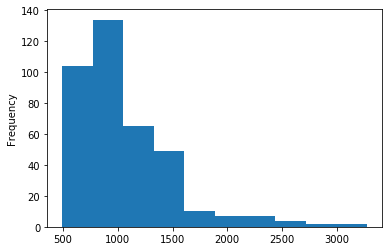

In [38]:
nation_rents = pd.Series(rents['rent'])
nation_rents.plot.hist()

Can you make the histogram smoother? 

`.plot.hist()` takes an optional argument named `bins`, which defines how many buckets the data is divided into.

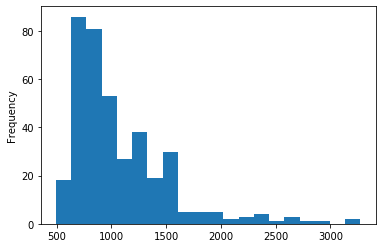

In [52]:
nation_rents.plot.hist(bins = 20) # test different numbers of bins

(You might want to create a new notebook for the next part, to keep things cleaner.)

Make a new variable showing the percentage change in rents from 2014 to 2019.

You can do this analogously to how we renamed the variables, but including a math expression on the right-hand side of the `=` assignment operator.

What's the mean and range of the changes?

Which cities had the largest and smallest changes?

What does a histogram of the changes look like? 

In [45]:
df['pct_change'] = 100*(df['2019-12']-df['2014-12'])/df['2014-12']
df['region'] = df['RegionName']
rent_change = df[['region','pct_change']].copy()
rent_change.head()

,region,pct_change
0,United States,10.0
1,"New York, NY",-5.0
2,"Los Angeles-Long Beach-Anaheim, CA",22.6
3,"Chicago, IL",7.0
4,"Dallas-Fort Worth, TX",24.8


In [46]:
rent_change['pct_change'].describe()

count    184.0
mean      26.6
std       19.5
min      -10.3
25%       13.5
50%       22.6
75%       39.4
max       93.8
Name: pct_change, dtype: float64

In [47]:
# mean of the changes
rent_change['pct_change'].mean()

26.59373586519905

In [51]:
# range of the changes
rent_change['pct_change'].describe()

count    184.0
mean      26.6
std       19.5
min      -10.3
25%       13.5
50%       22.6
75%       39.4
max       93.8
Name: pct_change, dtype: float64

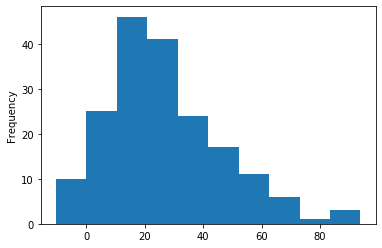

In [49]:
rent_change['pct_change'].plot.hist()